In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind
from datetime import date

import warnings
warnings.filterwarnings("ignore")
pd.options.display.max_rows = 9999

In [2]:
df = pd.read_csv('Supermarket Customers.csv', delimiter= r'\t')
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

## Data Dictionary

#### People
* ID: Customer's unique identifier
* Year_Birth: Customer's birth year
* Education: Customer's education level
* Marital_Status: Customer's marital status
* Income: Customer's yearly household income
* Kidhome: Number of children in customer's household
* Teenhome: Number of teenagers in customer's household
* Dt_Customer: Date of customer's enrollment with the company
* Recency: Number of days since customer's last purchase
* Complain: 1 if the customer complained in the last 2 years, 0 otherwise

#### Products
* MntWines: Amount spent on wine in last 2 years
* MntFruits: Amount spent on fruits in last 2 years
* MntMeatProducts: Amount spent on meat in last 2 years
* MntFishProducts: Amount spent on fish in last 2 years
* MntSweetProducts: Amount spent on sweets in last 2 years
* MntGoldProds: Amount spent on gold in last 2 years

#### Promotion
* NumDealsPurchases: Number of purchases made with a discount
* AcceptedCmp1: 1 if the customer accepted the offer in the 1st campaign, 0 otherwise
* AcceptedCmp2: 1 if the customer accepted the offer in the 2nd campaign, 0 otherwise
* AcceptedCmp3: 1 if the customer accepted the offer in the 3rd campaign, 0 otherwise
* AcceptedCmp4: 1 if the customer accepted the offer in the 4th campaign, 0 otherwise
* AcceptedCmp5: 1 if the customer accepted the offer in the 5th campaign, 0 otherwise
* Response: 1 if the customer accepted the offer in the last campaign, 0 otherwise

#### Place
* NumWebPurchases: Number of purchases made through the company’s website
* NumCatalogPurchases: Number of purchases made using a catalog
* NumStorePurchases: Number of purchases made directly in stores
* NumWebVisitsMonth: Number of visits to the company’s website in the last month

## Data Cleaning
Sebelum masuk ke dalam analisis, kita perlu mengenal dataset kita lebih jauh dalam tahapan *data understanding*. Dari proses ini, kita akan tahu anomali-anomali apa saja yang terdapat di dalam dataset kita dan perlu ditangani dalam tahapan *data cleaning*. Setiap penangan anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara *domain knowledge* maupun secara statistik.

Pertama, mari kita lihat informasidari dataset.

In [3]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (2240, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-nul

In [4]:
pd.set_option('display.max_colwidth', -1)
# data uni di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,ID,2240,"[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177, 4855, 5899, 1994, 387, 2125, 8180, 2569, 2114, 9736, 4939, 6565, 2278, 9360, 5376, 1993, 4047, 1409, 7892, 2404, 5255, 9422, 1966, 6864, 3033, 5710, 7373, 8755, 10738, 4339, 10755, 8595, 2968, 8601, 503, 8430, 7281, 2139, 1371, 9909, 7286, 7244, 6566, 8614, 4114, 1331, 2225, 9381, 6260, 10383, 7437, 8557, 8375, 6853, 3076, 1012, 6518, 4137, 8082, 1386, 9369, 4477, 1357, 1402, 10629, 6312, 8132, 1050, 5846, 1859, 7503, 10401, 1618, 3332, 2261, 5346, 4119, 535, 5268, 273, 4452, 8504, 771, 8996, 9235, 5798, 11178, 2230, 7516, 7247, 11100, 4646, 3037, ...]"
1,Year_Birth,59,"[1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1983, 1976, 1959, 1952, 1987, 1946, 1980, 1949, 1982, 1979, 1951, 1969, 1986, 1989, 1963, 1970, 1973, 1943, 1975, 1996, 1968, 1964, 1977, 1978, 1955, 1966, 1988, 1948, 1958, 1972, 1960, 1945, 1991, 1962, 1953, 1961, 1956, 1992, 1900, 1893, 1990, 1947, 1899, 1993, 1994, 1941, 1944, 1995, 1940]"
2,Education,5,"[Graduation, PhD, Master, Basic, 2n Cycle]"
3,Marital_Status,8,"[Single, Together, Married, Divorced, Widow, Alone, Absurd, YOLO]"
4,Income,1974,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, 62513.0, 55635.0, 33454.0, 30351.0, 5648.0, nan, 7500.0, 63033.0, 59354.0, 17323.0, 82800.0, 41850.0, 37760.0, 76995.0, 33812.0, 37040.0, 2447.0, 58607.0, 65324.0, 40689.0, 18589.0, 53359.0, 38360.0, 84618.0, 10979.0, 38620.0, 40548.0, 46610.0, 68657.0, 49389.0, 67353.0, 23718.0, 42429.0, 48948.0, 80011.0, 20559.0, 21994.0, 79941.0, 41728.0, 72550.0, 65486.0, 79143.0, 35790.0, 82582.0, 66373.0, 82384.0, 70287.0, 27938.0, 55954.0, 75777.0, 66653.0, 61823.0, 67680.0, 70666.0, 25721.0, 32474.0, 88194.0, 69096.0, 74854.0, 66991.0, 65031.0, 60631.0, 28332.0, 40246.0, 75251.0, 75825.0, 26326.0, 56046.0, 29760.0, 26304.0, 23559.0, 81361.0, 29440.0, 36138.0, 50388.0, 79593.0, 54178.0, 42394.0, 23626.0, 30096.0, 47916.0, 51813.0, 78497.0, 50150.0, 47823.0, 34554.0, 85693.0, 65846.0, 87195.0, 24594.0, 49096.0, 52413.0, 38557.0, 89058.0, 77298.0, ...]"
5,Kidhome,3,"[0, 1, 2]"
6,Teenhome,3,"[0, 1, 2]"
7,Dt_Customer,663,"[04-09-2012, 08-03-2014, 21-08-2013, 10-02-2014, 19-01-2014, 09-09-2013, 13-11-2012, 08-05-2013, 06-06-2013, 13-03-2014, 15-11-2013, 10-10-2012, 24-11-2012, 24-12-2012, 31-08-2012, 28-03-2013, 03-11-2012, 08-08-2012, 06-01-2013, 23-12-2012, 11-01-2014, 18-03-2013, 02-01-2013, 27-05-2013, 20-02-2013, 31-05-2013, 22-11-2013, 22-05-2014, 11-05-2013, 29-10-2012, 29-08-2013, 31-12-2013, 02-09-2013, 11-02-2014, 01-02-2013, 29-04-2013, 12-03-2013, 05-11-2013, 02-10-2013, 28-06-2014, 09-11-2012, 24-05-2013, 01-01-2014, 08-11-2012, 12-05-2014, 11-08-2012, 07-06-2014, 12-06-2013, 19-11-2012, 02-04-2013, 28-04-2014, 17-06-2013, 03-03-2014, 04-07-2013, 07-09-2012, 18-02-2013, 11-06-2013, 06-12-2013, 21-05-2013, 11-05-2014, 19-03-2014, 27-09-2013, 08-04-2013, 11-09-2012, 14-09-2012, 17-03-2013, 05-04-2013, 30-04-2014, 19-12-2012, 27-08-2012, 12-10-2012, 04-09-2013, 29-08-2012, 23-06-2013, 03-07-2013, 25-02-2014, 11-08-2013, 16-07-2013, 28-05-2014, 21-01-2014, 27-05-2014, 23-11-2013, 23-03-2014, 24-05-2014, 22-11-2012, 11-04-2013, 01-12-2013, 20-06-2013, 23-07-2013, 30-03-2014, 20-04-2013, 17-05-2013, 08-05-2014, 10-12-2013, 24-09-2013, 02-02-2013, 07-12-2012, 02-11-2013, 10-11-2012, 25-06-2014, ...]"
8,Recency,100,"[58, 38, 26, 94, 16, 34, 32, 19, 68, 11, 59, 82, 53, 23, 51, 20, 91, 86, 41, 42, 63, 0, 69, 89, 4, 96, 56, 31, 8, 55, 37, 76, 99, 3, 88, 80, 72, 24, 92, 39, 29, 2, 54, 57, 30, 12, 18, 75, 90, 1, 25, 40, 9, 87, 5, 95, 48, 70, 79, 45, 84, 44, 43, 35, 15, 17, 46, 27, 74, 85, 65, 13, 83, 10, 21, 61, 73, 47, 36, 49, 28, 64, 98, 78, 77, 81, 14, 52, 93, 50, 60, 66, 97, 62, 6, 33, 67, 22, 71, 7]"
9,MntWines,776,"[635, 11, 426, 173, 520, 235, 76, 14, 28, 5, 6, 194, 233, 3, 1006, 53, 84, 1012, 4, 86, 1, 867, 384, 270, 36, 684, 8, 112, 110, 96, 482, 40, 702, 55, 437, 421, 13, 9, 81, 123, 48, 826, 245, 650, 12, 510, 3

* Dari data diatas, terlihat bahwa dataset memiliki 28 kolom dan 2240 entries
* Dari 29 kolom, hanya 1 kolom yang tidak terisi secara full, yaitu kolom Income.

Ada 2 cara untuk menangani *missing value*:
* pertama, menghapus baris/kolom yang berisi *missing value*. Cara ini sebaiknya dalam kasus data kita harus dijadikan opsi terakhir, dikarenakan hanya terdapat 1 kolom yang tidak terisi penuh dan menghapus data akan membuat informasi di kolom lain yang notabene lengkap akan jadi terbuang sia-sia.
* kedua, mengisi data yang hilang. Cara ini lebih disarankan. Ada beberapa metode yang bisa digunakan untuk mengisi missing value, cara yang paling baik adalah dengan mengisi data yang hilang dengan nilai sebenarnya, atau sedekat mungkin dengan nilai asli. Dalam kasus ini, kita akan mencoba mengisi *missing value* berdasarkan kolom lain yang secara domain knowledge atau secara statistik berkaitan dengan kolom yang memiliki *missing value*. Jika masih ada kolom yang tidak bisa diisi, barulah kita mengisi dengan angka *mean, median* atau *modus*.

Maka dari itu, mari kita mulai dengan cara kedua. Kita akan lihat data categorical pendukung khusus untuk baris dengan kolom Income yang tidak terisi

In [5]:
df[df['Income'].isna()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,...,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,...,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,...,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,...,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,...,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,14-09-2012,25,25,...,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,...,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,27-05-2014,45,7,...,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,23-11-2013,87,445,...,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,11-07-2013,23,352,...,6,0,0,0,0,0,0,3,11,0


In [6]:
listItem = []
for col in df[df['Income'].isna()][['Year_Birth', 'Education', 'Marital_Status']].columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,Year_Birth,59,"[1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1983, 1976, 1959, 1952, 1987, 1946, 1980, 1949, 1982, 1979, 1951, 1969, 1986, 1989, 1963, 1970, 1973, 1943, 1975, 1996, 1968, 1964, 1977, 1978, 1955, 1966, 1988, 1948, 1958, 1972, 1960, 1945, 1991, 1962, 1953, 1961, 1956, 1992, 1900, 1893, 1990, 1947, 1899, 1993, 1994, 1941, 1944, 1995, 1940]"
1,Education,5,"[Graduation, PhD, Master, Basic, 2n Cycle]"
2,Marital_Status,8,"[Single, Together, Married, Divorced, Widow, Alone, Absurd, YOLO]"


Dari data Categorical, ternyata masih belum terlihat pattern yang jelas mengapa ada 24 entries yang tidak memilki data income. Kita coba lakukan cara terakhir dengan melihat korelasi antara Education, marital status dan year_birth (yg akan direpresentasikan dengan age bin)

In [7]:
def age_calc(birthdate):
    today = date.today()
    age = today.year - birthdate
    return age

ages = []

for dates in df.Year_Birth:
    ages.append(age_calc(dates))

df['Age'] = ages
df['Age_bin'] = pd.cut(x=df['Age'], bins=[10, 19, 29, 39, 49, 59, 69, 79, 89, 99, 109, 119, 129, 139], labels=['10s', '20s', '30s', '40s', '50s', '60s', '70s', '80s', '90s', '100s', '110s', '120s', '130s'])

Sebenarnya mencari korelasi antara data numerical dan categorical tidak terlalu tepat. Maka dari itu kita akan memngubah data categorical ke numerical terlebih dahulu dengan faktorisasi

In [8]:
df['Education Numerical'] = pd.factorize(df['Education'])[0]
df['Age_bin Numerical'] = pd.factorize(df['Age_bin'])[0]
df['Marital_Status Numerical'] = pd.factorize(df['Marital_Status'])[0]

Sekarang kita baru bisa mencari korelasi antara Income dengan Education, Age Bin dan Marital Status
Terlebih dahulu kita buat satu dataframe kecil baru yang hanya berisi Income, Education Numerical, Age_bin Numerical dan Maritas Status Numerical dan tanpa mengambil data income yang kosong

In [9]:
df_small = df[['Income', 'Education Numerical', 'Age_bin Numerical', 'Marital_Status Numerical']]
df_small = df_small.dropna()
np.shape(df_small)

(2216, 4)

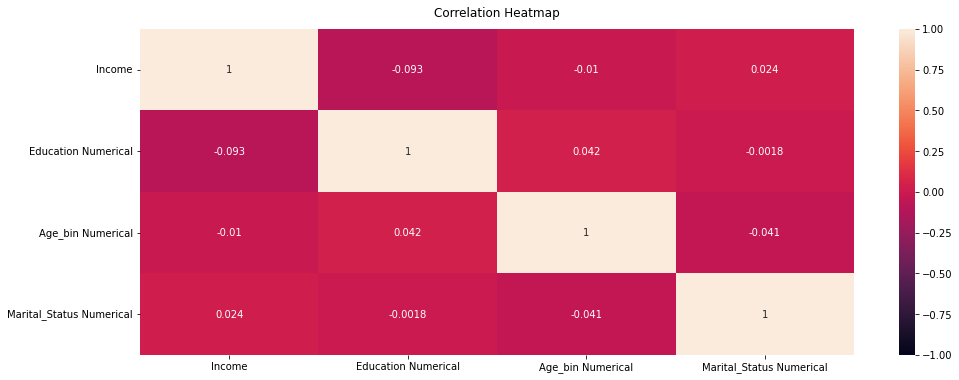

In [10]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))

# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df_small.corr(), vmin=-1, vmax=1, annot=True)

# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

Terlihat bahwa ternyata tidak ada korelasi yang pasti antara income dengan variable yang lain
korelasi antar variable pun sangat kecil sehingga dapat disimpulkan bahwa hubungan antar variable pun tidak saling terkait. Maka dari itu kita akan mengambil langkah terakhir untuk mengatasi data kosong ini dengan cara menghapusnya

Cara ini tidak disarankan, namun mengingat presentase data kosong hanya 1%, maka kita bisa menghapus data yang kosong

In [11]:
# Missing Values
# persentase missing value di tiap kolom
df.isna().sum()/df.shape[0]*100

ID                          0.000000
Year_Birth                  0.000000
Education                   0.000000
Marital_Status              0.000000
Income                      1.071429
Kidhome                     0.000000
Teenhome                    0.000000
Dt_Customer                 0.000000
Recency                     0.000000
MntWines                    0.000000
MntFruits                   0.000000
MntMeatProducts             0.000000
MntFishProducts             0.000000
MntSweetProducts            0.000000
MntGoldProds                0.000000
NumDealsPurchases           0.000000
NumWebPurchases             0.000000
NumCatalogPurchases         0.000000
NumStorePurchases           0.000000
NumWebVisitsMonth           0.000000
AcceptedCmp3                0.000000
AcceptedCmp4                0.000000
AcceptedCmp5                0.000000
AcceptedCmp1                0.000000
AcceptedCmp2                0.000000
Complain                    0.000000
Z_CostContact               0.000000
Z

In [12]:
df = df.dropna()

In [13]:
# Missing Values
# persentase missing value di tiap kolom
df.isna().sum()/df.shape[0]*100

ID                          0.0
Year_Birth                  0.0
Education                   0.0
Marital_Status              0.0
Income                      0.0
Kidhome                     0.0
Teenhome                    0.0
Dt_Customer                 0.0
Recency                     0.0
MntWines                    0.0
MntFruits                   0.0
MntMeatProducts             0.0
MntFishProducts             0.0
MntSweetProducts            0.0
MntGoldProds                0.0
NumDealsPurchases           0.0
NumWebPurchases             0.0
NumCatalogPurchases         0.0
NumStorePurchases           0.0
NumWebVisitsMonth           0.0
AcceptedCmp3                0.0
AcceptedCmp4                0.0
AcceptedCmp5                0.0
AcceptedCmp1                0.0
AcceptedCmp2                0.0
Complain                    0.0
Z_CostContact               0.0
Z_Revenue                   0.0
Response                    0.0
Age                         0.0
Age_bin                     0.0
Educatio

Data Sudah bersih, maka kita bisa melakukan analisis tanpa kuatir akan hasil yang bias karena kekosongan data

## Exploratory Data Analysis (EDA)

Pertama kita akan melihat dulu jumlah unique customer dari data yang kita miliki 

In [14]:
print(f'Jumlah unique customer yang dimilki sebanyak {len(df["ID"].unique())} customer') 
print(f'Presentase unique customer dalam data sebesar {(len(df["ID"].unique())/len(df["ID"]))*100}%') 

Jumlah unique customer yang dimilki sebanyak 2216 customer
Presentase unique customer dalam data sebesar 100.0%


Seluruh data customer yang kita miliki adalah unique customer
Karena seluruhnya unique customer, maka kita tidak perlu melakukan analisis dengan mengelompokkan berdasarkan unique customer

Untuk memulai analisis, kita perlu melihat jumlah barang barang yang terjual dari masing masing kategori

In [15]:
print(f'Wines : {df["MntWines"].sum()} products')
print(f'Fruits : {df["MntFruits"].sum()} products')
print(f'Meats : {df["MntMeatProducts"].sum()} products')
print(f'Sweets : {df["MntSweetProducts"].sum()} products')
print(f'Golds : {df["MntGoldProds"].sum()} products')
print(f'Fishs : {df["MntFishProducts"].sum()} products')

Wines : 676083 products
Fruits : 58405 products
Meats : 370063 products
Sweets : 59896 products
Golds : 97427 products
Fishs : 83405 products


* Terlihat bahwa top products dari supermarket adalah Wines sebanyak **676083** products
* Sedangkan product paling sedikit terjual adalah sweets sebanyak **59896** dan Fruits sebanyak **58405** product

Kita akan gunakan data awal ini untuk mencoba meningkatkan penjualan dari produk yang sedikit dibeli

### Target 1: Meningkatkan penjualan Sweets

Kita akan lihat profile orang orang yang membeli Sweets dibandingkan dengan profile keseluruhan customers

Rata-rata pembelian product Sweets

In [16]:
avg_sweets = df['MntSweetProducts'].mean()
avg_fruits = df['MntFruits'].mean()

print(f'Rata-rata pembelian sweets per customer = {avg_sweets} products')
print(f'Dan rata-rata pembelian fruits per customer = {avg_fruits} products')

Rata-rata pembelian sweets per customer = 27.028880866425993 products
Dan rata-rata pembelian fruits per customer = 26.356046931407942 products


Jadikan rata-rata menjadi kolom baru di df untuk melihat customer mana yang pembeliannya dibawah rata-rata

In [17]:
df['Avg_Sweets'] = avg_sweets
df['Avg_Fruits'] = avg_fruits

df['Below_Avg_Sweets'] = df['MntSweetProducts'] < df['Avg_Sweets']
df['Below_Avg_Fruits'] = df['MntFruits'] < df['Avg_Fruits']

Kita fokus terlebih dahulu ke penjualan **Sweets**

In [23]:
print(f'Persentase customer yang membeli Sweets di bawah rerata = {((len(df[df["Below_Avg_Sweets"]==True]) / len(df)) * 100)} %')

Persentase customer yang membeli Sweets di bawah rerata = 71.34476534296029 %


Secara Persentase, sebenarnya kita masih punya market yang sangat besar untuk memasarkan product sweets dikarenakan masih ada 71.3% customer yang melakukan pembelian dibawah rata-rata.

Maka dari itu penting kita perhatikan demografi customer yang masih melakukan pembelian dibawah rata-rata ini
Dikarenakan product sweet lebih terasosiasi dengan anak-anak, maka parameter yang paling pas untuk dilihat ada marital status (berkeluarga atau tidak), jumlah anak dan umur (age_bin)

In [42]:
for cat in df[df['Below_Avg_Sweets']==True][['Marital_Status', 'Age_bin']].columns:
    fig = px.bar(df[df['Below_Avg_Sweets']==True][cat])
    fig.show()
    print(df[df['Below_Avg_Sweets']==True][['ID',cat]].groupby(cat).count())

                 ID
Marital_Status     
Absurd          1  
Alone           3  
Divorced        166
Married         611
Single          332
Together        418
Widow           48 
YOLO            2  


          ID
Age_bin     
10s      0  
20s      7  
30s      172
40s      429
50s      477
60s      317
70s      172
80s      5  
90s      0  
100s     0  
110s     0  
120s     1  
130s     1  


Hasil yang cukup diluar dugaan karena penjualan sweets dibawah rata-rata, mayoritas adalah orang yang sudah berkeluarga
Mengenai hal ini, mari kita lihat customer yang melakukan pembelian diatas rata-rata

In [46]:
for cat in df[df['Below_Avg_Sweets']==False][['Marital_Status', 'Age_bin']].columns:
    fig = px.bar(df[df['Below_Avg_Sweets']==False][cat])
    fig.show()
    print(df[df['Below_Avg_Sweets']==False][['ID',cat]].groupby(cat).count())

                 ID
Marital_Status     
Absurd          1  
Divorced        66 
Married         246
Single          139
Together        155
Widow           28 


          ID
Age_bin     
10s      0  
20s      3  
30s      75 
40s      155
50s      164
60s      150
70s      84 
80s      3  
90s      0  
100s     0  
110s     0  
120s     1  
130s     0  


Hasil menunjukkan bahwa untuk pembelian diatas rata-rata tetap mayoritas dilakukan oleh yang sudah menikah/berkeluarga walaupun hasilnya tidak terlalu signifikan

Pertanyaan berikutnya muncul, apakah customer yang melakukan pembelian dibawah rata-rata memiliki rata-rata jumlah anak yang lebih sedikit atau tidak. Untuk itu data kita fokuskan ke setiap customer yang sudah menikah (married), together dan divorced

In [50]:
df_family = df[df['Marital_Status'].str.contains(r'Married|Together|Divorced')]

# Rata Rata jumlah anak yang membeli sweets dibawah rata-rata
df_family[df_family['Below_Avg_Sweets']==False]['Kidhome'].mean()

0.09850107066381156

In [51]:
# Rata Rata jumlah anak yang membeli sweets diatas rata-rata
df_family[df_family['Below_Avg_Sweets']==True]['Kidhome'].mean()

0.5832635983263599

Dari hasil ini jelas terlihat bahwa alasan mengapa walapun sudah berkeluarga tetapi penjualan sweets ke segmen ini masih banyak yang dibawah rata-rata dikarenakan jumlah anak yang mereka miliki **(0.09 vs 0.58)**

Sekarang sudah cukup terjawab mengapa penjualan sweets termasuk yang paling sedikit, hal ini dikarenakan segmen yang paling pas untuk target market dari Sweets adalah Sudah/Pernah berkeluarga dan memiliki anak di rumah

Tetapi apakah kita tidak bisa meningkatkan penjualan **Sweets**?
Tentu saja masih bisa, namun target market coba kita alihkan ke segmen lain, yaitu *Single*

Untuk *Single* sendiri, mereka seharusnya tidak memiliki tanggungan anak dirumah. Namun jumlah pembelian diatas rata-rata di segmen ini ada sebesar 29-30% (diambil dari 139 orang melakukan pembelian diatas rata-rata dari total segmen single sebanyak 471 orang)

Namun bisa kita coba lihat dulu bagaimana persebaran umur dari single yang membeli sweets diatas dan dibawah rata rata

In [53]:
## Single diatas rata-rata pembelian sweets

df_single = df[df['Marital_Status'].str.contains(r'Single')]

fig = px.bar(df_single[df_single['Below_Avg_Sweets']==False]['Age_bin'])
fig.show()
print(df_single[df_single['Below_Avg_Sweets']==False][['ID',cat]].groupby('Age_bin').count())

         ID
Age_bin    
10s      0 
20s      3 
30s      28
40s      30
50s      28
60s      35
70s      14
80s      1 
90s      0 
100s     0 
110s     0 
120s     0 
130s     0 


In [54]:
## Single dibawah rata-rata pembelian sweets

df_single = df[df['Marital_Status'].str.contains(r'Single')]

fig = px.bar(df_single[df_single['Below_Avg_Sweets']==True]['Age_bin'])
fig.show()
print(df_single[df_single['Below_Avg_Sweets']==True][['ID',cat]].groupby('Age_bin').count())

         ID
Age_bin    
10s      0 
20s      3 
30s      67
40s      88
50s      96
60s      49
70s      27
80s      1 
90s      0 
100s     0 
110s     0 
120s     0 
130s     1 


Dari kedua hasil diatas, tidak ada kecenderungan sebaran umur mana yang membeli **Sweets** diatas rata-rata
Sehingga promosi tetap dapat dipukul rata ke segmen *Single* segala umur 